In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt 
fig = plt.gcf() 
fig.set_size_inches(12, 8)
import seaborn as sns
%matplotlib inline
from pathlib import Path, PureWindowsPath

In [2]:
pwd

'C:\\Users\\emman\\Box\\Spring 2020\\Displacement Studio\\Shared 228 Sydney Folder\\AirBnB'

In [31]:
shp_file_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/SA2 Shapefiles")
sa2_shape16 = gpd.read_file(shp_file_path/'sa2_ucl.dbf')

airbnb_df = pd.read_csv('airbnb_sydney_listings.csv')

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's do some cleaning...

In [32]:
list(airbnb_df)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [33]:
# drop these columns because they're either empty or probably won't be of any use
airbnb_df.drop(['thumbnail_url','medium_url','picture_url','xl_picture_url','host_thumbnail_url',
                'instant_bookable','require_guest_phone_verification','neighbourhood_group_cleansed',
                'host_acceptance_rate','jurisdiction_names','host_url','host_response_time','host_response_rate',
                'host_is_superhost','host_picture_url','host_total_listings_count','host_verifications',
               'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm','calendar_updated','number_of_reviews','number_of_reviews_ltm',
                'first_review','last_review','review_scores_rating','review_scores_accuracy',
                'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                'review_scores_location','review_scores_value',],axis=1,inplace=True)

In [34]:
# we need to look at what different kinds of properties exist on airbnb and drop the ones that are not homes, 
# apartments, etc. 
airbnb_df.property_type.value_counts()
# we propbably don't need castle, other, tent, island, train, boat, or any other of the ridiculous values that are
# in here. 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Boutique hotel')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Bungalow')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Bed and breakfast')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Hostel')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Other')]  
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Hotel')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Boat')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Camper/RV')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Aparthotel')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Farm stay')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Tent')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Earth house')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Chalet')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Island')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Barn')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Resort')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Casa particular (Cuba)')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Yurt')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Train')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Treehouse')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Castle')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Heritage hotel (India)')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Campsite')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Dome house')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Hut')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Minsu (Taiwan)')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Cave')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Tipi')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Casa particular')]

In [8]:
airbnb_df.property_type.value_counts()

Apartment             22462
House                 10244
Townhouse              1723
Condominium             825
Guest suite             609
Guesthouse              500
Villa                   324
Loft                    241
Serviced apartment      228
Cottage                 141
Cabin                    69
Tiny house               49
Name: property_type, dtype: int64

In [36]:
# Clean date values to be actual dates
airbnb_df['host_since']=pd.to_datetime(airbnb_df['host_since'])
airbnb_df['last_scraped']=pd.to_datetime(airbnb_df['last_scraped'])

# pull individual year from host_since variable
airbnb_df['hs_year'] = pd.DatetimeIndex(airbnb_df['host_since']).year
airbnb_df['hs_year'].dropna(inplace=True)
airbnb_df['hs_year'].astype(int)

# fill in nulls with 0 or f
airbnb_df.bathrooms.fillna(0,inplace=True)

In [37]:
# Create a shapely.geometry.Point for each tweet
geometry = [Point(xy) for xy in zip(airbnb_df['longitude'], airbnb_df['latitude'])]
crs = {'init' :'epsg:4326'}
# Convert to GeoDataFrame, where each tweet's geometry is assigned to the lat/lon coords
airbnb_gdf = gpd.GeoDataFrame(airbnb_df, crs=crs, geometry=geometry)

In [38]:
airbnb_df.shape

(37415, 72)

# Calculate Density per SA2

In [44]:
sa2_shape16.crs = {'init':'epsg:4326'}

In [45]:
# perform a spatial join on the UCL SA2s to find density of AirBnB listings per SA2
list_density = gpd.sjoin(airbnb_gdf,sa2_shape16,how='right',op='within')

In [46]:
list_density.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 37287 entries, 0 to 264
Data columns (total 85 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   index_left                                    37273 non-null  float64       
 1   id                                            37273 non-null  float64       
 2   listing_url                                   37273 non-null  object        
 3   scrape_id                                     37273 non-null  float64       
 4   last_scraped                                  37273 non-null  datetime64[ns]
 5   name                                          37262 non-null  object        
 6   summary                                       35879 non-null  object        
 7   space                                         26041 non-null  object        
 8   description                                   36319 non-null

In [61]:
list_sa2 = pd.DataFrame({'list_per_SA2' : list_density.groupby('SA2_MAIN16')['SA2_MAIN16'].count()}).reset_index()

In [62]:
list_sa2 = pd.merge(list_sa2,sa2_shape16,on='SA2_MAIN16',how='left')
list_sa2 = gpd.GeoDataFrame(list_sa2)

In [66]:
list_sa2['listing_density'] = list_sa2.list_per_SA2/list_sa2.AREASQKM16

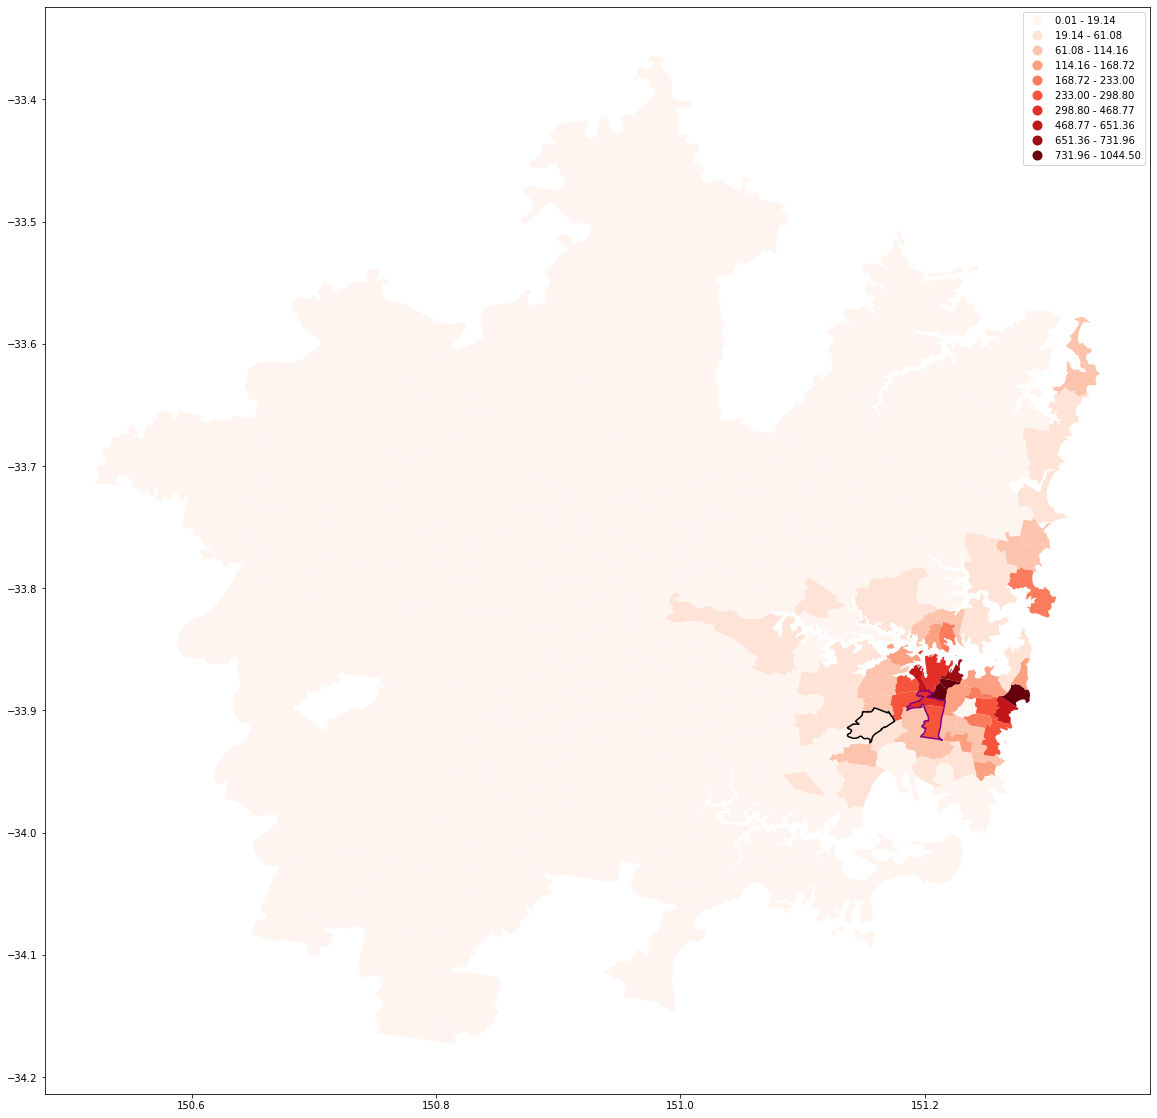

In [69]:
# plot geodf again with closeups 
figure, ax = plt.subplots(figsize=(28,20))
base= list_sa2.plot(column='listing_density', 
                        scheme = 'fisher_jenks',
                        k=10,legend=True,  
                        ax=ax,
                        cmap='Reds')

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Black", linewidth = 1.5)

In [39]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37415 entries, 0 to 38336
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            37415 non-null  int64         
 1   listing_url                                   37415 non-null  object        
 2   scrape_id                                     37415 non-null  float64       
 3   last_scraped                                  37415 non-null  datetime64[ns]
 4   name                                          37404 non-null  object        
 5   summary                                       36018 non-null  object        
 6   space                                         26163 non-null  object        
 7   description                                   36461 non-null  object        
 8   experiences_offered                           37415 non-null  obje

In [13]:
airbnb_df.describe()

,id,scrape_id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,count,hs_year
count,3.741500e+04,3.741500e+04,3.741500e+04,37409.000000,37415.000000,37415.000000,37415.000000,37415.000000,37373.000000,37370.000000,209.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,26938.000000,37415.0,37409.000000
mean,2.250878e+07,2.019110e+13,8.215042e+07,8.469887,-33.863012,151.199557,3.444367,1.363491,1.602735,2.007546,471.540670,1.620473,6.681785,15.249258,25.878070,88.345690,7.074516,6.151009,0.771803,0.101697,1.101814,1.0,2015.373573
std,1.097062e+07,0.000000e+00,8.146521e+07,27.940927,0.072062,0.087319,2.257149,0.668110,1.075408,1.529744,1691.848201,1.394714,10.107834,20.005139,31.275848,119.620899,22.036336,22.006256,1.990849,1.264379,1.499681,0.0,2.047202
min,1.115600e+04,2.019110e+13,1.289400e+04,0.000000,-34.135210,150.601470,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.0,2009.000000
25%,1.404523e+07,2.019110e+13,1.684168e+07,1.000000,-33.898485,151.176265,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.110000,1.0,2014.000000
50%,2.230922e+07,2.019110e+13,4.899394e+07,1.000000,-33.881740,151.213470,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,8.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.440000,1.0,2015.000000
75%,3.150027e+07,2.019110e+13,1.331896e+08,3.000000,-33.830615,151.259260,4.000000,1.500000,2.000000,3.000000,538.000000,2.000000,12.000000,28.000000,50.000000,149.000000,2.000000,1.000000,1.000000,0.000000,1.510000,1.0,2017.000000
max,3.987906e+07,2.019110e+13,3.070734e+08,357.000000,-33.389730,151.339870,16.000000,11.000000,16.000000,29.000000,21528.000000,16.000000,30.000000,60.000000,90.000000,365.000000,173.000000,173.000000,26.000000,28.000000,14.120000,1.0,2019.000000


In [14]:
#Grouping by host IDs how many days out of the year, on average, are their listings available?
h_n_list_av = pd.DataFrame({'avg_nights_365' : airbnb_df.groupby('property_type')['availability_365'].mean()}).reset_index()
h_n_list_av.sort_values(by='avg_nights_365',ascending= False)

,property_type,avg_nights_365
1,Cabin,197.710145
8,Serviced apartment,183.631579
9,Tiny house,155.571429
11,Villa,150.898148
5,Guesthouse,144.610000
4,Guest suite,131.574713
3,Cottage,123.510638
7,Loft,102.721992
6,House,102.317259
10,Townhouse,89.557168


## Analyzing the patterns of growth for different AirBnB property types

In [15]:
prop_year = pd.pivot_table(airbnb_df,index='property_type',columns='hs_year',values='count',aggfunc=np.sum,fill_value=0)
prop_year.reset_index(inplace=True)
prop_year.columns=(['property_type','2009','2010','2011','2012','2013',
                    '2014','2015','2016','2017','2018','2019'])
prop_year_melt = pd.melt(prop_year, 
        id_vars='property_type',
        value_vars = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
        value_name='prop_count')
prop_year_melt

,property_type,variable,prop_count
0,Apartment,2009,17
1,Cabin,2009,0
2,Condominium,2009,0
3,Cottage,2009,0
4,Guest suite,2009,0
5,Guesthouse,2009,2
6,House,2009,13
7,Loft,2009,2
8,Serviced apartment,2009,0
9,Tiny house,2009,0


Text(0.1, 0.1, 'Source: Inside AirBnB 2019 Scrape Sydney, AU')

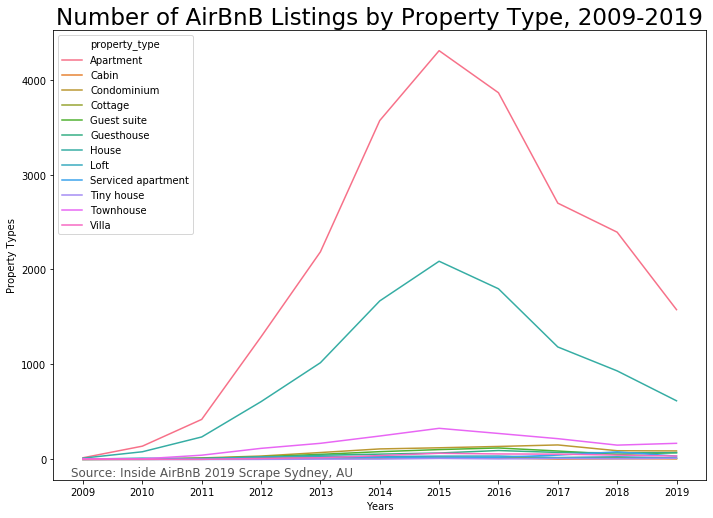

In [16]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_title('Number of AirBnB Listings by Property Type, 2009-2019', fontdict={'fontsize':23})
g = sns.lineplot(x='variable', y='prop_count', data=prop_year_melt, hue='property_type',ax=ax)

plt.xlabel('Years')
plt.ylabel('Property Types')

ax.annotate('Source: Inside AirBnB 2019 Scrape Sydney, AU',
            xy=(0.1, .10),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

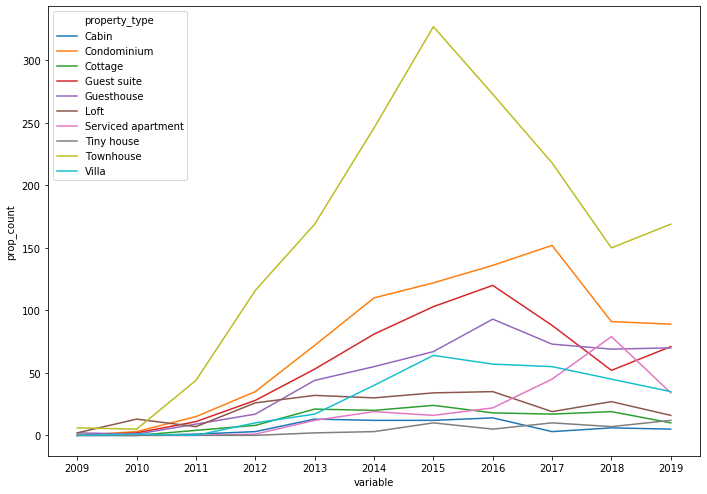

In [17]:
prop_year_melt=prop_year_melt[prop_year_melt.property_type!='Apartment']
prop_year_melt=prop_year_melt[prop_year_melt.property_type!='House']
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.lineplot(x='variable', y='prop_count', data=prop_year_melt, hue='property_type',ax=ax)

In [18]:
pd.pivot_table(airbnb_df,
               index='property_type',
               columns='hs_year',
               values='count',
               aggfunc=np.sum,
              margins=True)


hs_year,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,All
property_type,,,,,,,,,,,,
Apartment,17.0,139.0,421.0,1291.0,2186.0,3569.0,4305.0,3862.0,2699.0,2393.0,1577.0,22459
Cabin,NaN,NaN,1.0,3.0,13.0,12.0,12.0,14.0,3.0,6.0,5.0,69
Condominium,NaN,3.0,15.0,35.0,72.0,110.0,122.0,136.0,152.0,91.0,89.0,825
Cottage,NaN,NaN,4.0,8.0,21.0,20.0,24.0,18.0,17.0,19.0,10.0,141
Guest suite,NaN,2.0,11.0,28.0,53.0,81.0,103.0,120.0,88.0,52.0,71.0,609
Guesthouse,2.0,1.0,9.0,17.0,44.0,55.0,67.0,93.0,73.0,69.0,70.0,500
House,13.0,80.0,236.0,608.0,1018.0,1669.0,2087.0,1797.0,1184.0,932.0,617.0,10241
Loft,2.0,13.0,7.0,26.0,32.0,30.0,34.0,35.0,19.0,27.0,16.0,241
Serviced apartment,NaN,NaN,NaN,1.0,12.0,19.0,16.0,22.0,45.0,79.0,34.0,228


## Analyzing trends for number of hosts that have more than one listing in AirBnB

I think it's important to separate out the groups that have more than one AirBnB listing because of our stressing of how financialization of housing affects the market. In our literature review, we found that about 1/5 of Australians own more than one home. If that's the case, let's see how many times there are more than three, and then how the distribution of them look in a scatter plot

### Question 1: Of the hosts that have >= 2 properties, how are they distributed spatially?

Methodology: 

1. Isolate host_ids where hosts own more than 3 properties
1. Let's work on a heatmap where the points on a map show where the distribution of properties that hosts have >= 2 listings are

In [19]:
from scipy import ndimage
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6

In [20]:
#create a dataframe out of a groupby that groups host IDs and counts the listing IDs in associated to them
test_df = pd.DataFrame({'cnt_list_host' : airbnb_df.groupby('host_id')['id'].count()}).reset_index()
# create a new geodataframe that only has listing id, host id, and geometry
test_gdf2 = airbnb_gdf[['id','host_id','geometry']]
# test merge 
test_merge = pd.merge(test_df,test_gdf2,on='host_id',how='left')
# isolate new dataframe to only have listings where the count of listings per host are >=2
test_merge = test_merge[test_merge.cnt_list_host>=2]
# create a new geodataframe
tm_gdf = gpd.GeoDataFrame(test_merge, crs=crs)
#perform a geospatial join on the new test dataframe so that we can perform this at the sa2 level
tm_gdf2 = gpd.sjoin(tm_gdf,sa2_shape16,how='right',op='within')
#perform a geospatial join on the new test dataframe so that we can perform this at the sa2 level
tm_gdf3 = gpd.sjoin(tm_gdf,sa2_shape16,how='right',op='within')

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'init': 'epsg:4283'})
  "(%s != %s)" % (left_df.crs, right_df.crs)
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'init': 'epsg:4283'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [21]:
tm_gdf2.dropna(inplace=True)
tm_gdf2= tm_gdf2.reset_index()
tm_gdf3.dropna(inplace=True)

In [22]:
# create a new dataframe that isolates the hosts with more than three listings in AirBnB
hw2l= airbnb_gdf.loc[airbnb_df.host_listings_count>=2]
hw2l.isnull().sum()
hw2l.dropna(thresh=0,inplace=True)
sa2_shape16.isnull().sum()
sa2_shape16.dropna(inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


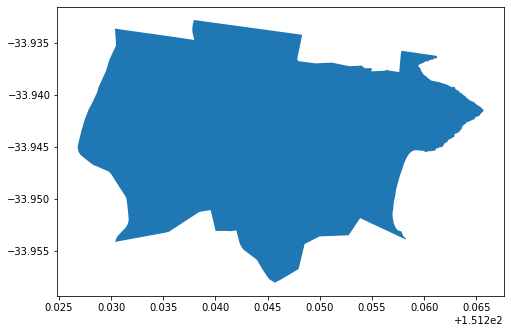

In [23]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo, Merrickville and Maroubra
maroubra_gdf = sa2_shape16[(sa2_shape16.SA2_MAIN16=='118021566')
                          |(sa2_shape16.SA2_MAIN16=='118021567')
                          |(sa2_shape16.SA2_MAIN16=='118021568')]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
maroubra_simple = maroubra_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
maroubra_sgdf=maroubra_simple.dissolve(by="SA4_NAME16")
maroubra_sgdf.plot()

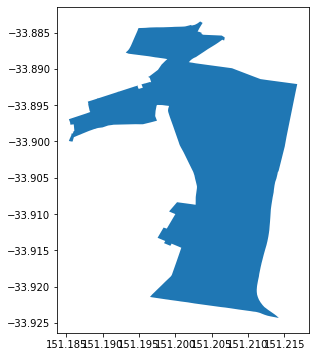

In [24]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo, Merrickville and Maroubra
red_wat_gdf = sa2_shape16[(sa2_shape16.SA2_MAIN16=='117031335')
                          |(sa2_shape16.SA2_MAIN16=='117031338')]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

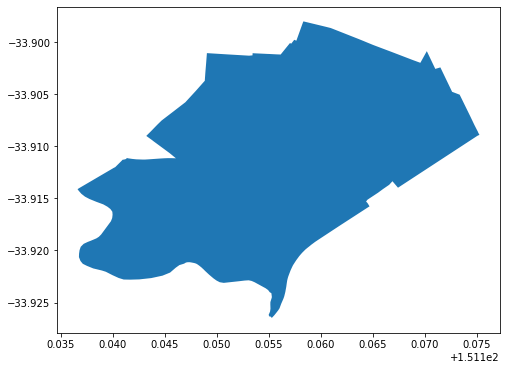

In [25]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo, Merrickville and Maroubra
marr_gdf = sa2_shape16[(sa2_shape16.SA2_MAIN16=='117021326')]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

In [26]:
list(hw2l)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_neighbourhood',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'requires_license',
 'license',
 'is_bu

In [27]:
# spatial join with the nsw data
hw2l = gpd.sjoin(hw2l,sa2_shape16,how='left',op='within')



C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'init': 'epsg:4283'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [28]:
tm_gdf.head()

,host_id,cnt_list_host,id,geometry
1,14093,2,8974359,POINT (151.22417 -33.86763)
2,14093,2,9743495,POINT (151.22496 -33.86874)
3,15030,2,28720008,POINT (151.07486 -33.84873)
4,15030,2,32124043,POINT (151.07537 -33.84773)
6,17061,2,12351,POINT (151.19190 -33.86515)


In [29]:
sa2_shape16 = sa2_shape16[(sa2_shape16.SA4_CODE16=='122') | (sa2_shape16.SA4_CODE16=='121') | (sa2_shape16.SA4_CODE16=='120') | 
                 (sa2_shape16.SA4_CODE16=='119') | (sa2_shape16.SA4_CODE16=='117') | (sa2_shape16.SA4_CODE16=='118')|
                 (sa2_shape16.SA4_CODE16=='125') | (sa2_shape16.SA4_CODE16=='126')]

In [30]:
#drop all columns that won't be of any use in this analysis 
hw2l.drop(['thumbnail_url','medium_url','picture_url','xl_picture_url','host_thumbnail_url',
                'instant_bookable','require_guest_phone_verification','neighbourhood_group_cleansed',
                'host_acceptance_rate','jurisdiction_names','host_url','host_response_time','host_response_rate',
                'host_is_superhost','host_picture_url','host_total_listings_count','host_verifications',
               'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm','calendar_updated','number_of_reviews','number_of_reviews_ltm',
                'first_review','last_review','review_scores_rating','review_scores_accuracy',
                'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                'review_scores_location','review_scores_value'],axis=1,inplace=True)

KeyError: "['thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'\n 'host_thumbnail_url' 'instant_bookable'\n 'require_guest_phone_verification' 'neighbourhood_group_cleansed'\n 'host_acceptance_rate' 'jurisdiction_names' 'host_url'\n 'host_response_time' 'host_response_rate' 'host_is_superhost'\n 'host_picture_url' 'host_total_listings_count' 'host_verifications'\n 'minimum_nights' 'maximum_nights' 'minimum_minimum_nights'\n 'maximum_minimum_nights' 'minimum_maximum_nights'\n 'maximum_maximum_nights' 'minimum_nights_avg_ntm'\n 'maximum_nights_avg_ntm' 'calendar_updated' 'number_of_reviews'\n 'number_of_reviews_ltm' 'first_review' 'last_review'\n 'review_scores_rating' 'review_scores_accuracy'\n 'review_scores_cleanliness' 'review_scores_checkin'\n 'review_scores_communication' 'review_scores_location'\n 'review_scores_value'] not found in axis"

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


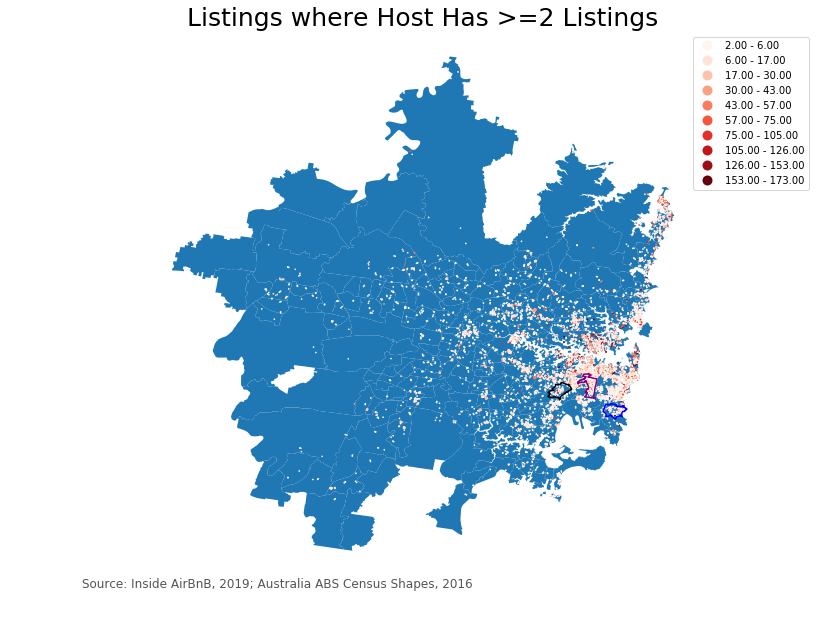

In [40]:
figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shape16.plot(ax=ax)
tm_gdf.plot(column="cnt_list_host", 
              scheme = "fisher_jenks", 
              k = 10, 
              legend=True, 
              ax=base, 
              cmap="Reds",
             markersize=.5)
maroubra_sgdf.plot(ax=base, facecolor='none', edgecolor = "Blue", linewidth = 1.5)
red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Black", linewidth = 1.5)
lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('Listings where Host Has >=2 Listings', fontdict={'fontsize':25})

ax.annotate('Source: Inside AirBnB, 2019; Australia ABS Census Shapes, 2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

In [ ]:
tm_gdf3.info()

In [ ]:
figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shape16.plot(ax=ax)
tm_gdf3.plot(column="cnt_list_host", 
              scheme = "fisher_jenks", 
              k = 10, 
              legend=True, 
              ax=base, 
              cmap="Reds",
             markersize=.5)
maroubra_sgdf.plot(ax=base, facecolor='none', edgecolor = "Blue", linewidth = 1.5)
red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Black", linewidth = 1.5)
lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('SA2s by Hosts with high number of listings', fontdict={'fontsize':25})

ax.annotate('Source: Inside AirBnB, 2019; Australia ABS Census Shapes, 2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

In [ ]:
figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shape16.plot(ax=ax)
tm_gdf2.plot(column="cnt_list_host", 
              scheme = "fisher_jenks", 
              k = 5, 
              legend=True, 
              ax=base, 
              cmap="Reds",
             markersize=.5)

maroubra_sgdf.plot(ax=base, facecolor='none', edgecolor = "Blue", linewidth = 1.5)
red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('Listings where Host Has >=2 Listings', fontdict={'fontsize':25})

ax.annotate('Source: Inside AirBnB, 2019; Australia ABS Census Shapes, 2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

In [ ]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
pts = tm_gdf
figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shape16.plot(ax=ax,color='')
heatmap(pts, bins=100, smoothing=.25,)

In [ ]:
# sns.set(style="whitegrid", palette="muted")
# hw2l_melt = pd.melt(hw3l, 
#                     id_vars=['property_type','host_listings_count','geometry'],
#                     value_vars="count", var_name="Property Types")
# hw2l_melt


In [ ]:
prop_year = pd.pivot_table(airbnb_df,index='property_type',
                           columns='hs_year',
                           values='count',aggfunc=np.sum,fill_value=0)
prop_year.reset_index(inplace=True)

In [ ]:
# Grouping by host IDs how many hosts own more than 2 listings
h_n_list = pd.DataFrame({'cnt_list_host' : airbnb_df.groupby('host_id')['id'].count()}).reset_index()
mer_df = airbnb_df[['host_id','hs_year','property_type','room_type']]
hnlav_df = pd.merge(h_n_list,mer_df,on='host_id',how='left')

In [ ]:
data = hnlav_df.loc[(hnlav_df.hs_year==2009) & ((hnlav_df.property_type=='Apartment')|
                                                (hnlav_df.property_type=='House'))]

ax = sns.countplot(data=data, x='property_type', color='darkslategray')

# Seaborn can pass us a Matplotlib "axes" object for editing the labels
ax.set_title("")
#ax.set_xticklabels(['walk', 'cycle', 'drive', 'bus', 'train'])
ax.set_xlabel('')

plt.show()

In [ ]:
airbnb_df.host_id.value_counts()

In [ ]:
hnlav_df.info()

In [ ]:
# subset the data to only include hosts that have more than 1 listing (onviously these people are loaded)
data = h_n_list_av.loc[(h_n_list_av['hs_year'] == 2013) & 
                 (h_n_list_av.cnt_list_host >= 3)]

ax = sns.distplot(a = data.cnt_list_host,
                  bins = 10,
                  color = 'green',
                 hist=True,
                 kde=False)

ax.set_title('Distribution of hosts w/ >=3 listings on AirBnB')
plt.show()

In [ ]:
airbnb_df['count'] = 1
airbnb_df['count']

In [ ]:
airbnb_df.property_type.value_counts()

In [ ]:
# let's plot out the different kinds of housing types by year
data = airbnb_df #.loc[(airbnb_df['hs_year'] == 2009)
                     
ax = sns.countplot(data=data, x='property_type', color='darkslategray')

ax.set_title('Number of Listings by Property Type in 2009')
#ax.set_xticklabels(['walk', 'cycle', 'drive', 'bus', 'train'])
ax.set_xlabel('')

plt.show()

In [ ]:
# Let's look at the upper range of hosts that have 3 or more listings
up_hosts = airbnb_df.loc[airbnb_df.host_total_listings_count>=3]

Next steps: 

* Aggregate total host listings in dataframe and apply point geometry 
* Have them be inside of each one of the SA2s 
* Look at the distribution of where the most listings per host are in the Greater Sydney region 

In [ ]:
figure, ax = plt.subplots(figsize=(50,50))
base = sa2_shape16.plot(column='STE_CODE16', legend=True, ax=ax, cmap='Greys')
airbnb_gdf.plot(ax=base, markersize=10, color="orange")
sa2_shape.plot(ax=base, facecolor='none', edgecolor="black", linewidth=1)

lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('AirBnB Listings in Sydney, 2019', fontdict= 
            {'fontsize':75})

plt.show()